In [1]:
import tensorflow as tf
import numpy as np

## Math

In [2]:
a = tf.placeholder("int32")
b = tf.placeholder("int32")
y = tf.multiply(a, b)
sess = tf.InteractiveSession()
print(sess.run(y, feed_dict={a: 2, b: 4}))

8


In [3]:
y.eval(feed_dict={a:5, b:8})

40

## Tensor

In [4]:
tf_tensor_list = tf.convert_to_tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
tf_tensor_ndarray = tf.convert_to_tensor(np.array([1., 2., 3., 4.]))

In [5]:
print(sess.run(tf_tensor_list))
print(sess.run(tf_tensor_ndarray))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 1.  2.  3.  4.]


In [6]:
tf.rank(tf_tensor_list)

<tf.Tensor 'Rank:0' shape=() dtype=int32>

In [7]:
tf.shape(tf_tensor_ndarray)

<tf.Tensor 'Shape:0' shape=(1,) dtype=int32>

In [8]:
tf_tensor_2d = tf.reshape(tf_tensor_list, [4, -1])
print(sess.run(tf_tensor_2d))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [9]:
print(sess.run(tf_tensor_2d[1][1]))

6


In [10]:
tf_tensor_2d.shape

TensorShape([Dimension(4), Dimension(4)])

## Image

In [11]:
import matplotlib.image as mp_image

In [12]:
filename = 'tensorflow.jpg'
input_image = mp_image.imread(filename)

In [13]:
print("Input dim = {}".format(input_image.ndim))
print("Input shape = {}".format(input_image.shape))

Input dim = 3
Input shape = (512, 512, 3)


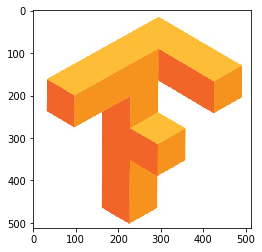

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(input_image)
plt.show()

In [15]:
my_image = tf.placeholder(tf.uint8, [None, None, 3])
img_slice = tf.slice(my_image, begin=[50, 0, 0], size=[50, -1, -1])

In [16]:
result = sess.run(img_slice, feed_dict={my_image: input_image})
print(result.shape)

(50, 512, 3)


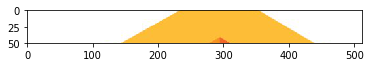

In [17]:
plt.imshow(result)
plt.show()

In [18]:
x = tf.Variable(input_image, name='x')

In [ ]:
x = tf.transpose(x, perm=[1, 0, 2])
sess.run(tf.global_variables_initializer())
result = sess.run(x)

In [ ]:
plt.imshow(result)
plt.show()

# Gradient

In [ ]:
x = tf.placeholder(tf.float32)
y = 2 * x * x
var_grad = tf.gradients(y, x)
sess.run(var_grad, feed_dict={x : 1})

## Random Numbers

In [ ]:
uniform = tf.random_uniform([10], minval=0, maxval=1, dtype=tf.float32)
print(uniform.eval())

In [ ]:
uniform = tf.random_uniform([10000], minval=0, maxval=1, dtype=tf.float32)
plt.hist(uniform.eval(), normed=True)
plt.show()

In [ ]:
norm = tf.random_normal([1000], mean=0, stddev=2)
plt.hist(norm.eval(), normed=True)
plt.show()